## Face Detection using OpenCV

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
img=cv2.imread("sharapova1.jpg")

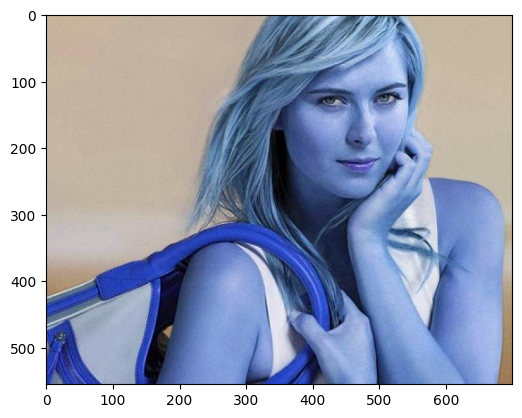

In [3]:
plt.imshow(img)

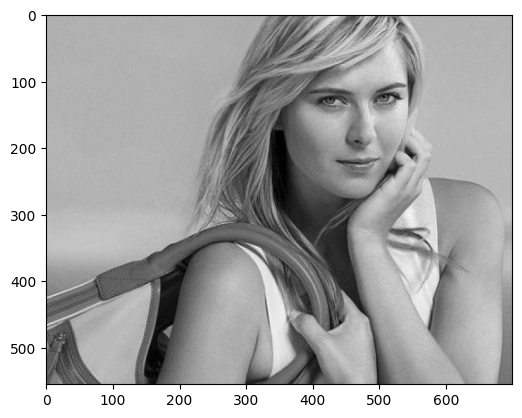

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [5]:
img.shape

(555, 700, 3)

In [6]:
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")

In [7]:
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [8]:
(x,y,w,h)=faces[0]

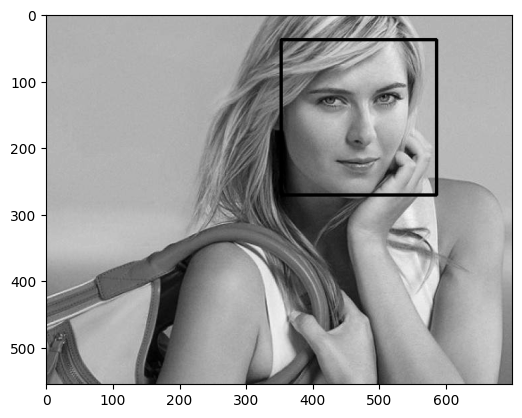

In [9]:
imgg=cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(imgg,cmap="gray")

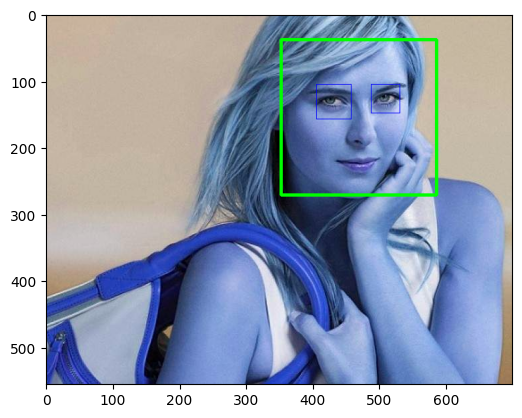

In [10]:
for (x,y,w,h) in faces:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_color,1.3,5)
    for (ex,ey,ew,eh) in eyes:
        roi_color=cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),1)
        
plt.imshow(img)    

## Cropped_Image

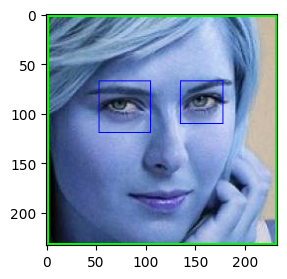

In [21]:
plt.figure(figsize=(4,3))
cropped_img=roi_color
plt.imshow(cropped_img)

## Writing a function that takes image that has more than equal to two eyes

In [12]:
def cropped_image_if_eyes_more_2(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray,1.3,5)
        if len(eyes)>=2:
            return roi_gray
           

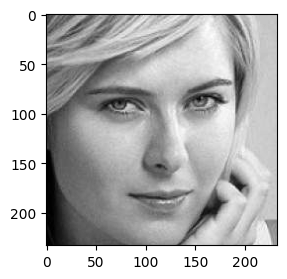

In [20]:
plt.figure(figsize=(4,3))
cropped_image=cropped_image_if_eyes_more_2("sharapova1.jpg")
plt.imshow(cropped_image,cmap="gray")

In [14]:
cropped_image=cropped_image_if_eyes_more_2("2900.jpg")
cropped_image

## Wavelet Transformed Image for getting facial features effectively like eyebrows, eyes ,nose ,lips etc

In [15]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

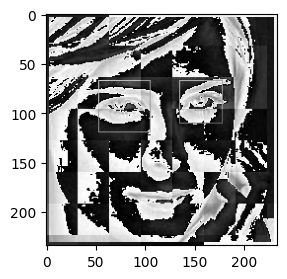

In [19]:
plt.figure(figsize=(4,3))
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [23]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs

['./Dataset/cropped',
 './Dataset/lionel_messi',
 './Dataset/maria_sharapova',
 './Dataset/roger_federer',
 './Dataset/serena_williams',
 './Dataset/virat_kohli']

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = cropped_image_if_eyes_more_2(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./Dataset/cropped/lionel_messi
Generating cropped images in folder:  ./Dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./Dataset/cropped/roger_federer
Generating cropped images in folder:  ./Dataset/cropped/serena_williams
Generating cropped images in folder:  ./Dataset/cropped/virat_kohli


In [28]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split("/")[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict   

{'lionel_messi': ['./Dataset/cropped/lionel_messi\\lionel_messi1.png',
  './Dataset/cropped/lionel_messi\\lionel_messi10.png',
  './Dataset/cropped/lionel_messi\\lionel_messi11.png',
  './Dataset/cropped/lionel_messi\\lionel_messi12.png',
  './Dataset/cropped/lionel_messi\\lionel_messi13.png',
  './Dataset/cropped/lionel_messi\\lionel_messi14.png',
  './Dataset/cropped/lionel_messi\\lionel_messi15.png',
  './Dataset/cropped/lionel_messi\\lionel_messi16.png',
  './Dataset/cropped/lionel_messi\\lionel_messi17.png',
  './Dataset/cropped/lionel_messi\\lionel_messi18.png',
  './Dataset/cropped/lionel_messi\\lionel_messi19.png',
  './Dataset/cropped/lionel_messi\\lionel_messi2.png',
  './Dataset/cropped/lionel_messi\\lionel_messi20.png',
  './Dataset/cropped/lionel_messi\\lionel_messi21.png',
  './Dataset/cropped/lionel_messi\\lionel_messi22.png',
  './Dataset/cropped/lionel_messi\\lionel_messi3.png',
  './Dataset/cropped/lionel_messi\\lionel_messi4.png',
  './Dataset/cropped/lionel_messi\\l

In [30]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [54]:
X=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img_=cv2.imread(training_img)
        scalled_raw_image=cv2.resize(img_,(32,32))
        X.append(scalled_raw_image)
        y.append(class_dict[celebrity_name])

In [55]:
len(X[0])

32

In [56]:
len(X)

119

In [69]:
X =np.array(X).astype(float)
X.shape

(119, 32, 32, 3)

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [154]:
len(X_train)

95

In [155]:
X_train=X_train/255
X_test=X_test/255

In [158]:
X_train[0].shape

(32, 32, 3)

In [159]:
X_train.shape

(95, 32, 32, 3)

In [160]:
X_test.shape

(24, 32, 32, 3)

In [161]:
len(X_test)

24

In [162]:
y_train=np.array(y_train)

In [163]:
y_test=np.array(y_test)

In [166]:
y_test

array([0, 3, 2, 3, 4, 3, 0, 1, 0, 4, 2, 3, 1, 1, 4, 4, 0, 4, 1, 3, 3, 1,
       4, 3])

In [167]:
model=tf.keras.Sequential([
    keras.layers.Conv2D(16,3,input_shape=(32,32,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
        
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])
model.build(input_shape=(32,32,3))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 32)              

In [168]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [169]:
model.fit(X_train,y_train,epochs=25,verbose=1)

Epoch 1/25
3/3 [==============================] - 4s 72ms/step - loss: 1.6101 - accuracy: 0.2947
Epoch 2/25
3/3 [==============================] - 0s 74ms/step - loss: 1.5557 - accuracy: 0.3263
Epoch 3/25
3/3 [==============================] - 0s 74ms/step - loss: 1.4843 - accuracy: 0.4632
Epoch 4/25
3/3 [==============================] - 0s 75ms/step - loss: 1.4609 - accuracy: 0.4316
Epoch 5/25
3/3 [==============================] - 0s 78ms/step - loss: 1.3916 - accuracy: 0.4947
Epoch 6/25
3/3 [==============================] - 0s 80ms/step - loss: 1.3327 - accuracy: 0.4737
Epoch 7/25
3/3 [==============================] - 0s 75ms/step - loss: 1.2649 - accuracy: 0.4842
Epoch 8/25
3/3 [==============================] - 0s 75ms/step - loss: 1.1787 - accuracy: 0.5684
Epoch 9/25
3/3 [==============================] - 0s 74ms/step - loss: 1.0824 - accuracy: 0.6632
Epoch 10/25
3/3 [==============================] - 0s 70ms/step - loss: 0.9852 - accuracy: 0.6842
Epoch 11/25
3/3 [============

In [170]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 1s 575ms/step - loss: 1.3932 - accuracy: 0.6250


[1.3932147026062012, 0.625]

In [171]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 234ms/step


In [172]:
y_pred[0]

array([0.9998732 , 0.3030611 , 0.94037396, 0.04021643, 0.9928845 ],
      dtype=float32)

In [173]:
np.argmax(y_pred[2])

1

In [174]:
y_test[2]

2

In [175]:
y_pred=[np.argmax(i) for i in y_pred]

In [176]:
y_pred[20]

3

In [177]:
y_test[20]

3

In [178]:
from sklearn.metrics import classification_report ,confusion_matrix

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.67      0.80      0.73         5
           2       0.50      0.50      0.50         2
           3       0.60      0.43      0.50         7
           4       0.83      0.83      0.83         6

    accuracy                           0.62        24
   macro avg       0.60      0.61      0.60        24
weighted avg       0.63      0.62      0.62        24



In [180]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(0.5, 47.7222222222222, 'predictions')

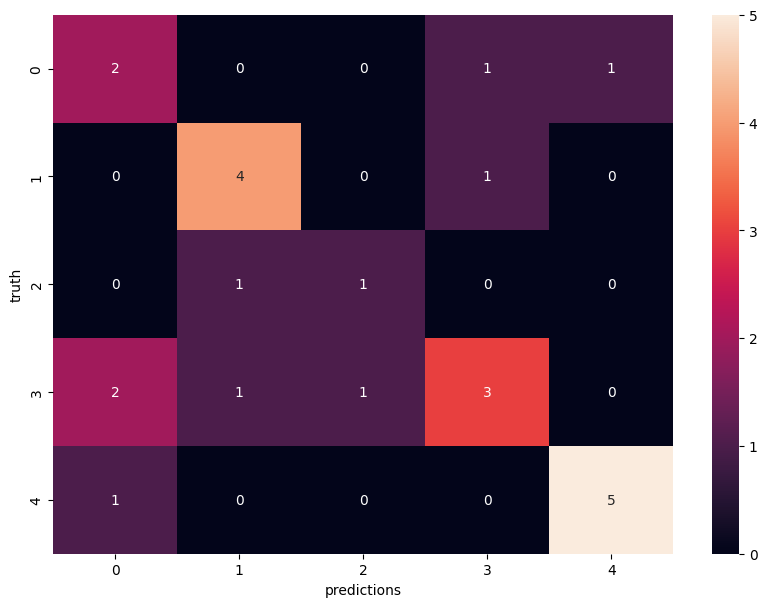

In [182]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel("truth")
plt.xlabel("predictions")